# Programming with Python

Tutors: Drazen Petrov (drazen.petrov@boku.ac.at) & Yerko Escalona (yerko.escalona@boku.ac.at)

## Lecture 6

Overview:

- Numpy 2
  - numerical integration 
  - matrix multiplication
- Matplotlib
  - subplots
  - axes
  - layout - margins
  - color bar


## Integration problem
trapezoidal rule<br>
see https://en.wikipedia.org/wiki/Trapezoidal_rule

In [1]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/1/10/WikiTrap.gif')

### Making the data

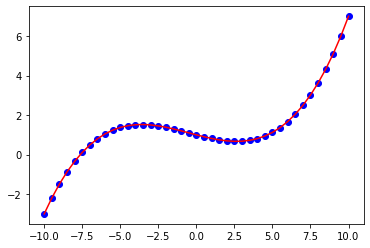

In [2]:
from matplotlib import pyplot as plt

def fnc(x):
    return 0.007*x*x*x + 0.01*x*x - 0.2*x + 1
    
x = [(i-20)/2 for i in range(41)] # -10, -9.5, -9, ..., 9.5, 10
y = [fnc(i) for i in x]


plt.plot(x, y, 'bo')
plt.plot(x, y, 'r-')
plt.show()

### Algorithm

##### Idea:
split the x range (that is of length N) into N-1 segments. for each segment, calculate the average of the y values and based on that, the area of the trapez defined by the x axis and the 2 points of the segment

##### Algorithm:

1. initialize a sum (integral) to 0 
1. repeat: generate an index (i) that starts with 0 and increases by 1 until N-1
    1. assign x1 = x[i]
    1. assign x2 = x[i+1]
    1. assign y1 = y[i]
    1. assign y2 = y[i+1]
    1. area = (x2 - x1) * (y1 + y2) / 2
    1. add area to the sum



In [3]:
# implementation
integral_sum = 0
for i in range(len(x) - 1):
    x1 = x[i]
    x2 = x[i + 1]
    y1 = y[i]
    y2 = y[i + 1]
    area = (x2 - x1) * (y1 + y2) / 2
    integral_sum += area

print(integral_sum)

26.675000000000004


### with Numpy

In [4]:
import numpy as np

def fnc(x):
    return 0.007*x*x*x + 0.01*x*x - 0.2*x + 1

x = np.linspace(-10,10,41)
y = fnc(x)

print(x)
print(y)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10. ]
[-3.       -2.199125 -1.493    -0.876375 -0.344     0.109375  0.489
  0.800125  1.048     1.237875  1.375     1.464625  1.512     1.522375
  1.501     1.453125  1.384     1.298875  1.203     1.101625  1.
  0.903375  0.817     0.746125  0.696     0.671875  0.679     0.722625
  0.808     0.940375  1.125     1.367125  1.672     2.044875  2.491
  3.015625  3.624     4.321375  5.113     6.004125  7.      ]


In [5]:
(np.diff(x) * (y[:-1] + y[1:]) / 2).sum() # full calculation in one line

26.675

In [6]:
np.trapz(y, x) # even better, use already implemented trapz function

26.675


advantages of using Numpy for this specific case:

- in order to create `x` and `y` variables, you don't need `for` loops
- you have already implemented the trapezoidal rule algorithm
- it is optimized (faster execution)
- it is precise

## Matrix multiplication
A (m x n); B (n x p)<br>
A * B = C, where C is (m, p) such that:
$$ c_{i,j} = \sum_{k=1}^{n} a_{i,k} * b_{k,j}$$
see https://en.wikipedia.org/wiki/Matrix_multiplication

### with lists

In [7]:
def mat_mul(A, B):
    C = []
    if len(A[0]) == len(B): # make sure that number of columns in A is the same as 
        for i in range(len(A)):
            new_row = []
            for j in range(len(B[0])):
                s = 0
                for k in range(len(B)): # same as len(A[0])
                    s += A[i][k] * B[k][j]
                new_row.append(s)
            C.append(new_row)
        return C
    else:
        print('mulptiplication not possible')

A = [[1,2,3], [4,5,6]]
B = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
B_wrong_size = [[1, 2], [4, 5]]
C = mat_mul(A, B)
C

[[30, 36, 42], [66, 81, 96]]

In [8]:
mat_mul(A, B_wrong_size)

mulptiplication not possible


### with numpy

In [9]:
def np_mat_mul(A, B):
    if A.shape[1] == B.shape[1]:
        C = np.empty((A.shape[0], B.shape[1])) # make an empty matrix
        for i, j in np.ndindex(C.shape): # loop over elements
            C[i,j] = np.sum(A[i] * B[:,j]) # calculate new elements
        return C
    else:
        print('mulptiplication not possible')

A = np.array(A)
B = np.array(B)
B = np.array(B)
C = np_mat_mul(A, B)
C

array([[30., 36., 42.],
       [66., 81., 96.]])

In [10]:
B_wrong_size = np.array(B_wrong_size)
np_mat_mul(A, B_wrong_size)

mulptiplication not possible


### numpy matmul function

In [11]:
np.matmul(A, B)

array([[30, 36, 42],
       [66, 81, 96]])

In [12]:
np.matmul(A, B_wrong_size)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

# BREAK

## Numpy + Matplotlib

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-np.pi*2, np.pi*2, 256) # generate x values

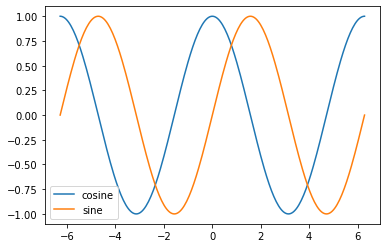

In [14]:
plt.plot(x, np.cos(x), label="cosine") # generate and plot cosine
plt.plot(x, np.sin(x), label="sine") # generate and plot sine
plt.legend() # add legend
plt.show()

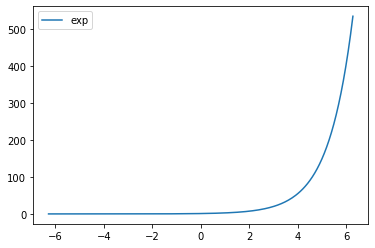

In [15]:
plt.plot(x, np.exp(x), label="exp")  # generate and plot exp
plt.legend()
plt.show()

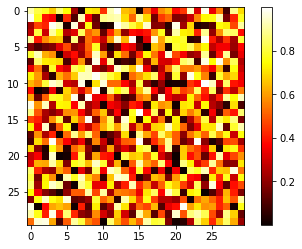

In [16]:
random_data = np.random.rand(30, 30) # generate random data (shape = 30 x 30)
plt.imshow(random_data, cmap=plt.cm.hot) # 30 x 30 plot - color represents random data generate above
plt.colorbar()   
plt.show()

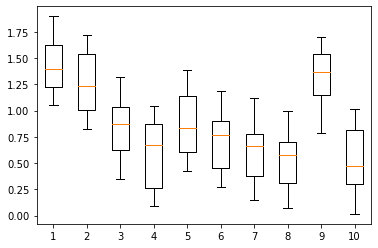

In [17]:
np.random.seed(0)
random_data2 = np.random.rand(30, 10) # generate random data (shape = 30 x 30)
offset = np.random.rand(10)
random_data2 += offset
plt.boxplot(random_data2)
plt.show()

## Mathematical functions

How to represent the following mathematical function in Python?
$$f(x) = \exp(x)$$

In [18]:
# using math module
import math
f = math.exp
f(1)

2.718281828459045

In [19]:
import numpy as np
x = np.linspace(-3,3,21)
f(x)

TypeError: only size-1 arrays can be converted to Python scalars

In [20]:
# using the numpy library
f = np.exp
f(1)

2.718281828459045

In [21]:
x = np.linspace(-3,3,21)
f(x)

array([ 0.04978707,  0.06720551,  0.09071795,  0.12245643,  0.16529889,
        0.22313016,  0.30119421,  0.40656966,  0.54881164,  0.74081822,
        1.        ,  1.34985881,  1.8221188 ,  2.45960311,  3.32011692,
        4.48168907,  6.04964746,  8.16616991, 11.02317638, 14.87973172,
       20.08553692])

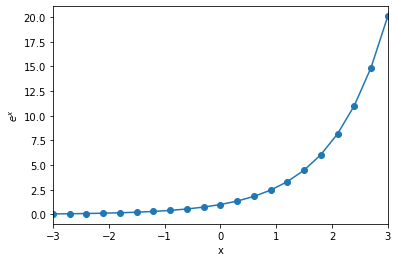

In [22]:
import matplotlib.pyplot as plt
plt.plot(x, f(x), 'o-')
plt.xlabel("x")
plt.ylabel("$e^x$")
plt.xlim(-3, 3)
plt.show()

How to represent the following mathematical function in Python?
$$x^3 + 4x^2 -11x + 4$$

#### Polynomial function

In [23]:
def f(x):
    return x*x*x - 4*x*x + -11*x + 4 

x = np.linspace(-10,10,50)
y = f(x)

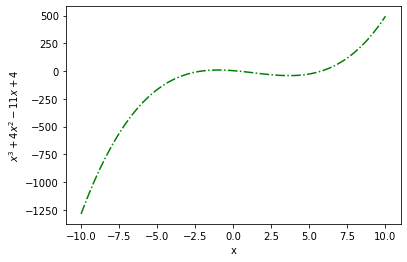

In [24]:
#plt.plot(x,y)
plt.plot(x, f(x), '-.', color = 'g')
plt.xlabel('x')
plt.ylabel('$x^3 + 4x^2 -11x + 4$')
plt.show()

### Subplots 2 (using axes)

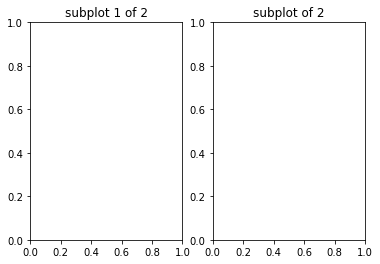

In [25]:
plt.subplot(121)
plt.title("subplot 1 of 2")

plt.subplot(122)
plt.title("subplot of 2")

plt.show()

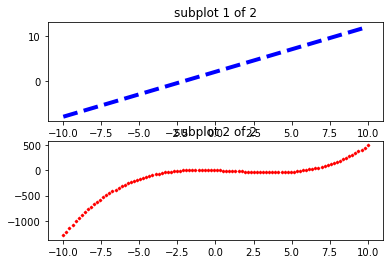

In [26]:
def f(x):
    return x*x*x - 4*x*x + -11*x + 4 

x = np.linspace(-10,10, 100)
y1 = x + 2
y2 = f(x)

plt.subplot(211)
plt.title("subplot 1 of 2")
plt.plot(x,y1, color = 'b', linestyle='dashed', linewidth=4)

plt.subplot(212)
plt.title("subplot 2 of 2")
plt.plot(x, y2, color = 'r', marker = 'D', markersize=2, linewidth=0)


plt.show() # not so nice...

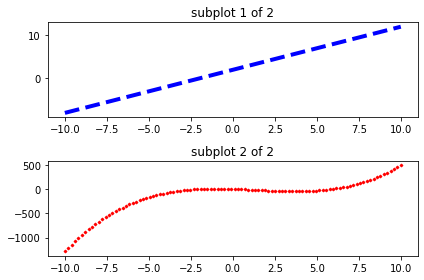

In [27]:
# tight_layout
plt.subplot(211)
plt.title("subplot 1 of 2")
plt.plot(x,y1, color = 'b', linestyle='dashed', linewidth=4)

plt.subplot(212)
plt.title("subplot 2 of 2")
plt.plot(x, y2, color = 'r', marker = 'D', markersize=2, linewidth=0)

plt.tight_layout() # fix 1
plt.show()

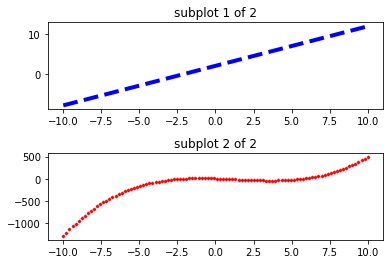

In [28]:
# subplots_adjust
plt.subplot(211)
plt.title("subplot 1 of 2")
plt.plot(x,y1, color = 'b', linestyle='dashed', linewidth=4)

plt.subplot(212)
plt.title("subplot 2 of 2")
plt.plot(x, y2, color = 'r', marker = 'D', markersize=2, linewidth=0)


plt.subplots_adjust(hspace = 0.5) # fix 2
#plt.subplots_adjust(hspace = 2.5, left = 0.5)
plt.show()

### using subplots and axes

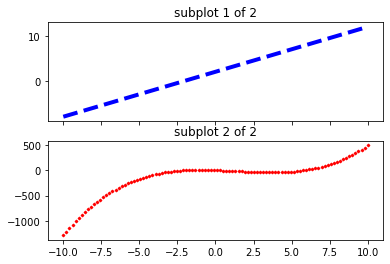

In [29]:
fix, ax = plt.subplots(2,1, sharex = True)
ax[0].set_title("subplot 1 of 2")
ax[0].plot(x, y1, color = 'b', linestyle='dashed', linewidth=4)

ax[1].set_title("subplot 2 of 2")
ax[1].plot(x, y2, color = 'r', marker = 'D', markersize=2, linewidth=0)

plt.show()

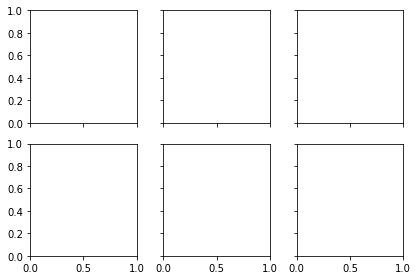

In [30]:
fix, ax = plt.subplots(2, 3, sharex=True, sharey=True)
plt.tight_layout()
plt.show()


In [31]:
print(len(ax))
print(len(ax[0]))

2
3


In [32]:
# make random data of 11 points
x = np.linspace(0, 10, 11)
np.random.seed(1)
y = np.random.random(11)
e = np.random.random(11) * 0.1

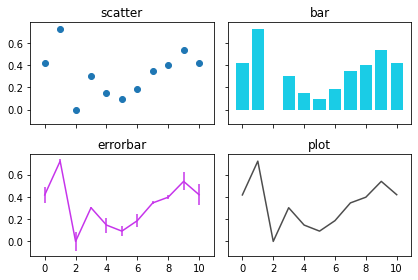

In [33]:
fix, ax = plt.subplots(2, 2, sharex=True, sharey=True)

ax[0][0].scatter(x, y)
ax[0][0].set_title('scatter')

ax[0][1].bar(x, y, color = [0.1, 0.8, 0.9]) # RGB
ax[0][1].set_title('bar')

ax[1][0].errorbar(x, y, e, color = '#c634eb') # HEX
ax[1][0].set_title('errorbar')

ax[1][1].plot(x, y, color = '0.3') # grayscale
ax[1][1].set_title('plot')


plt.tight_layout()
plt.show()



#### legend location

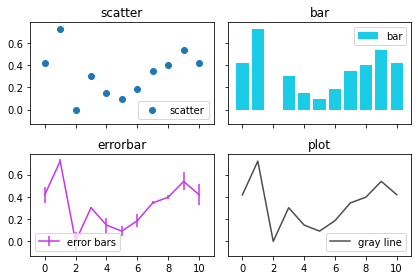

In [34]:
fix, ax = plt.subplots(2, 2, sharex=True, sharey=True)

ax[0][0].scatter(x, y, label='scatter')
ax[0][0].set_title('scatter')
ax[0][0].legend(loc = 4)

ax[0][1].bar(x, y, color = [0.1, 0.8, 0.9], label = 'bar') # RGB
ax[0][1].set_title('bar')
ax[0][1].legend()#default position

ax[1][0].errorbar(x, y, e, color = '#c634eb', label='error bars') # HEX
ax[1][0].set_title('errorbar')
ax[1][0].legend(loc = 3)

line = ax[1][1].plot(x, y, color = '0.3', label='gray line') # grayscale
ax[1][1].set_title('plot')
ax[1][1].legend(loc = 'lower right') # same as loc = 4

plt.tight_layout()
plt.show()



#### Markers
see https://matplotlib.org/stable/api/markers_api.html

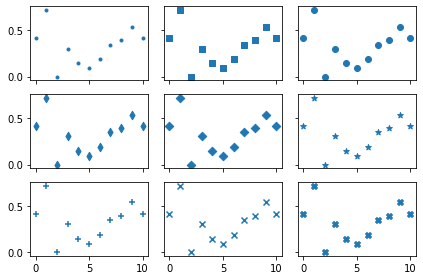

In [35]:
fix, ax = plt.subplots(3, 3, sharex=True, sharey=True)

ax[0][0].scatter(x, y, marker='.')
ax[0][1].scatter(x, y, marker=',')
ax[0][2].scatter(x, y, marker='o')

ax[1][0].scatter(x, y, marker='d')
ax[1][1].scatter(x, y, marker='D')
ax[1][2].scatter(x, y, marker='*')

ax[2][0].scatter(x, y, marker='+')
ax[2][1].scatter(x, y, marker='x')
ax[2][2].scatter(x, y, marker='X')


plt.tight_layout()
plt.show()


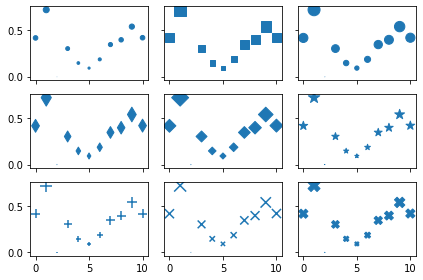

In [36]:
# marker size dependent on the value
fix, ax = plt.subplots(3, 3, sharex=True, sharey=True)

ax[0][0].scatter(x, y, marker='.', s=y*200)
ax[0][1].scatter(x, y, marker=',', s=y*200)
ax[0][2].scatter(x, y, marker='o', s=y*200)

ax[1][0].scatter(x, y, marker='d', s=y*200)
ax[1][1].scatter(x, y, marker='D', s=y*200)
ax[1][2].scatter(x, y, marker='*', s=y*200)

ax[2][0].scatter(x, y, marker='+', s=y*200)
ax[2][1].scatter(x, y, marker='x', s=y*200)
ax[2][2].scatter(x, y, marker='X', s=y*200)


plt.tight_layout()
plt.show()


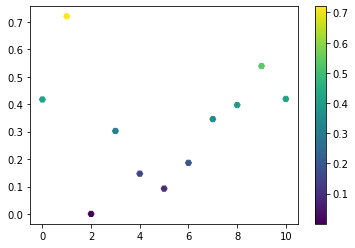

In [37]:
# marker color dependent on the value
plt.scatter(x,y, marker = 'H', c = y)
plt.colorbar()
plt.show()

#### different color map
https://matplotlib.org/stable/tutorials/colors/colormaps.html

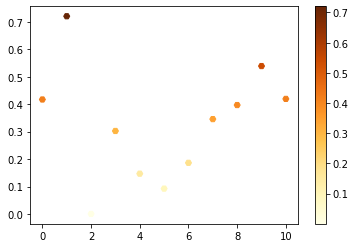

In [38]:
from matplotlib import cm
cmap = cm.get_cmap('YlOrBr') # yellow orange brown
plt.scatter(x,y, marker = 'H', c = y, cmap=cmap)
plt.colorbar()
plt.show()


#### some extra legend options
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

In [39]:
# make some random data
np.random.seed(1)
random_data = np.random.rand(3, 16) # generate random data (shape = 3 x 10)
#offset = np.random.rand(3) * 5
offset = np.array([2.2, 4.5, 1.5])

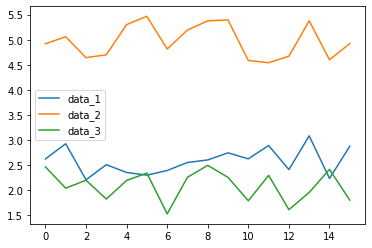

In [40]:
for i in range(3):
    plt.plot(random_data[i] + offset[i], label='data_'+str(i+1))

plt.legend()
plt.show()

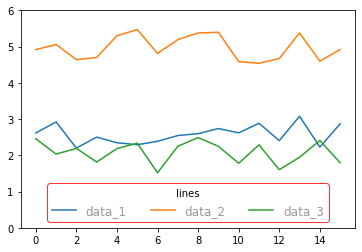

In [41]:
for i in range(3):
    plt.plot(random_data[i] + offset[i], label='data_'+str(i+1))

plt.ylim(0,6)
plt.legend(loc = 'lower center', ncol = 3, fontsize='large', labelcolor='0.6', edgecolor='r', title='lines')
plt.show()

#### thicks options
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

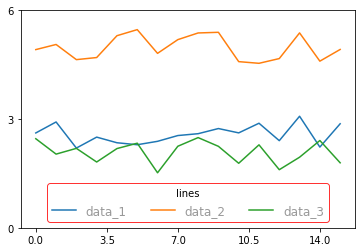

In [42]:
for i in range(3):
    plt.plot(random_data[i] + offset[i], label='data_'+str(i+1))

plt.ylim(0,6)
plt.yticks(np.linspace(0,6,3))
plt.xticks(np.linspace(0,14,5))
plt.legend(loc = 'lower center', ncol = 3, fontsize='large', labelcolor='0.6', edgecolor='r', title='lines')
plt.show()

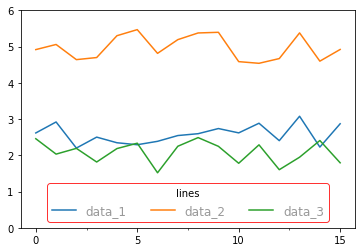

In [43]:
from matplotlib.ticker import MultipleLocator
ax = plt.axes()

for i in range(3):
    ax.plot(random_data[i] + offset[i], label='data_'+str(i+1))


ax.set_ylim(0,6)
ax.xaxis.set_major_locator(MultipleLocator(5)) # major ticks (separation of 5)
ax.xaxis.set_minor_locator(MultipleLocator(2.5)) # minor ticks (separation of 2.5)
ax.legend(loc = 'lower center', ncol = 3, fontsize='large', labelcolor='0.6', edgecolor='r', title='lines')
plt.show()


##### log scale

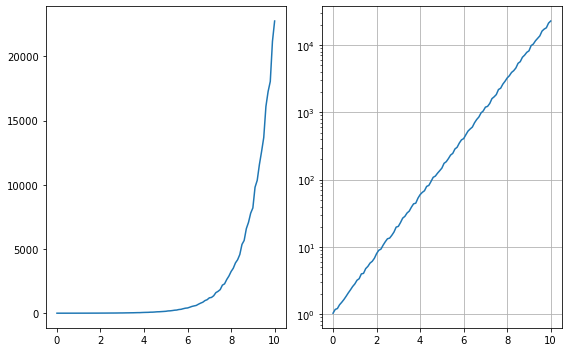

In [44]:
np.random.seed(1)
x = np.linspace(0,10,101)
y = np.exp(x) + np.random.rand(101) * np.exp(x) * 0.1
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8,5))
ax[0].plot(x,y)
ax[1].set_yscale('log') # log scale
ax[1].grid()
ax[1].plot(x, y)
plt.tight_layout()
plt.show()